Data source : https://www.kaggle.com/grassknoted/asl-alphabet   
This notebook is test models with 2 layer CNN + Msx Pooling and 3 layer CNN + Max Pooling on the given test images as well as few ASL images downloaded from the net.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

2021-10-17 09:47:11.785375: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
image_path = "../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  image_path,
  image_size=(224,224),
  batch_size=32,
validation_split=0.25,
  subset="training",
  seed=323,
color_mode = 'grayscale')


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  image_path,
  image_size=(224,224),
  batch_size=32,
validation_split=0.25,
  subset="validation",
  seed=323,
color_mode = 'grayscale')

test_path = "../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test"



Found 87000 files belonging to 29 classes.
Using 65250 files for training.


2021-10-17 09:48:08.030093: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-17 09:48:08.034210: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-17 09:48:08.087987: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-17 09:48:08.088967: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-10-17 09:48:08.089027: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-10-17 09:48:08.123536: I tensorflow/stream_executor/platform/def

Found 87000 files belonging to 29 classes.
Using 21750 files for validation.


In [3]:
import glob
import pathlib 

data_dir = pathlib.Path(image_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))
print(class_names)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'del' 'nothing' 'space']


In [4]:
import cv2
import os


def load_images_from_folder(folder):
    images = []
    test_class = []
    for filename in os.listdir(folder):
        test_class.append(filename[0])
        img = cv2.imread(os.path.join(folder,filename), 0)
        img = cv2.resize(img , (224,224))
        if img is not None:
            images.append(img)
    return images, test_class

pred_images, test_class = load_images_from_folder(test_path)
test_class

['A',
 'E',
 'L',
 'N',
 'S',
 'D',
 'G',
 'I',
 'W',
 'M',
 'n',
 'X',
 'H',
 'Q',
 'C',
 'T',
 'P',
 'V',
 'Y',
 'U',
 's',
 'O',
 'B',
 'R',
 'F',
 'Z',
 'J',
 'K']

In [5]:
type(pred_images)

list

In [6]:
pred_images = np.array(pred_images)
print(pred_images.shape)
pred_images_resized = pred_images.reshape(pred_images.shape[0], 224, 224, 1)
print(pred_images_resized.shape)

(28, 224, 224)
(28, 224, 224, 1)


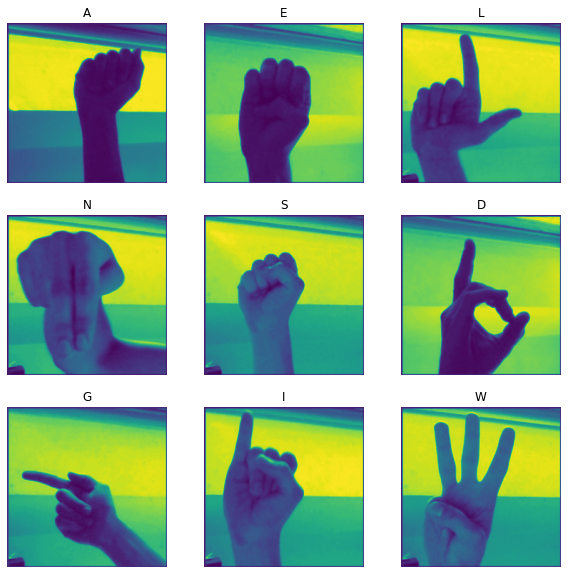

In [7]:
## visualize prediction images 
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(pred_images[i])
    plt.title(test_class[i])
    plt.axis("off")

In [8]:
## new test images 
test_path_1 = "../input/new-test-1"
##
test_class_1 = []
##
pred_images_1, test_class_1 = load_images_from_folder(test_path_1)
print(test_class_1)
##
pred_images_1 = np.array(pred_images_1)
print(pred_images_1.shape)
pred_images1_resized = pred_images_1.reshape(pred_images_1.shape[0], 224, 224, 1)
print(pred_images1_resized.shape)

['A', 'I', 'C', 'W']
(4, 224, 224)
(4, 224, 224, 1)


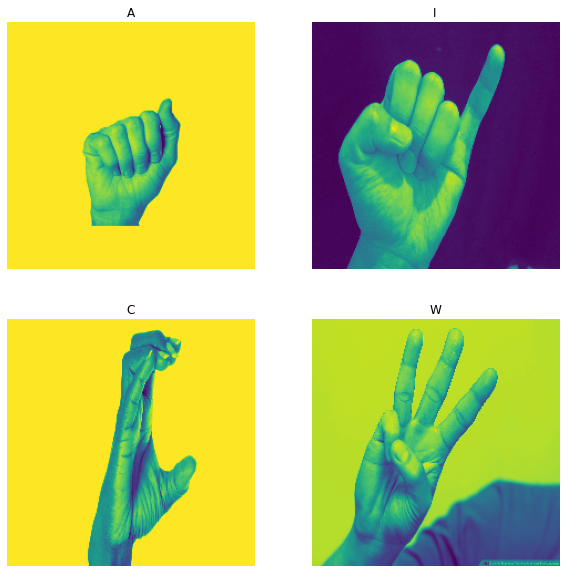

In [9]:
## visualize the new prediction images 
plt.figure(figsize=(10, 10))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(pred_images_1[i])
    plt.title(test_class_1[i])
    plt.axis("off")

2021-10-17 09:49:46.729823: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-17 09:49:46.734357: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2200000000 Hz


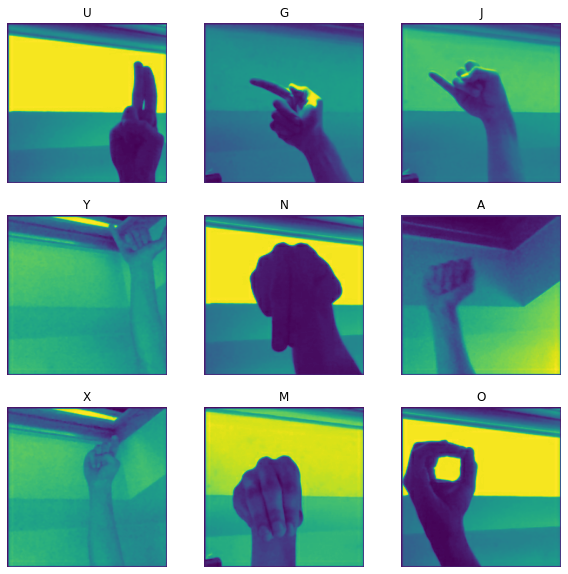

In [10]:
## visualize train set images
image_batch, label_batch = next(iter(train_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

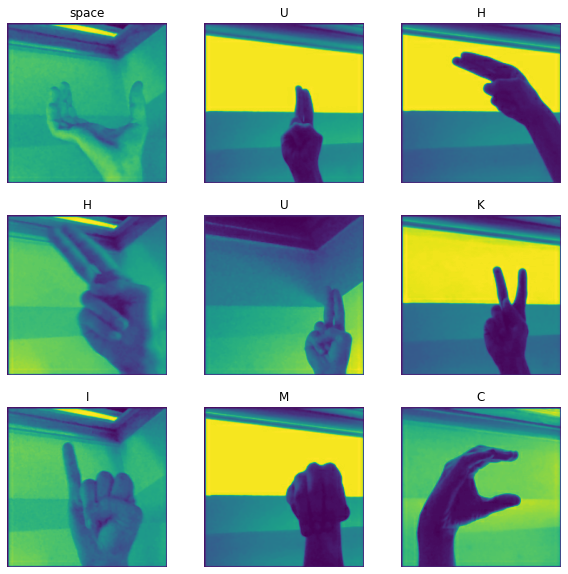

In [11]:
## visualize validation images 
image_batch, label_batch = next(iter(val_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

Epoch 1/10


2021-10-17 09:50:16.045024: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-10-17 09:50:17.122469: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-10-17 09:50:17.147256: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


2040/2040 [==============================] - 453s 218ms/step - loss: 6.4363 - accuracy: 0.4373 - val_loss: 0.4843 - val_accuracy: 0.8386
Epoch 2/10
2040/2040 [==============================] - 114s 56ms/step - loss: 0.3243 - accuracy: 0.8876 - val_loss: 0.3563 - val_accuracy: 0.8788
Epoch 3/10
2040/2040 [==============================] - 115s 56ms/step - loss: 0.1541 - accuracy: 0.9490 - val_loss: 0.3081 - val_accuracy: 0.9091
Epoch 5/10
2040/2040 [==============================] - 114s 56ms/step - loss: 0.1285 - accuracy: 0.9595 - val_loss: 0.4217 - val_accuracy: 0.8917
Epoch 6/10
1602/2040 [======================>.......] - ETA: 19s - loss: 0.1216 - accuracy: 0.9599

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2040/2040 [==============================] - 114s 56ms/step - loss: 0.0963 - accuracy: 0.9706 - val_loss: 0.2357 - val_accuracy: 0.9382
Epoch 8/10
2040/2040 [==============================] - 116s 57ms/step - loss: 0.0758 - accuracy: 0.9773 - val_loss: 0.2722 - val_accuracy: 0.9283
Epoch 9/10
2040/2040 [==============================] - 115s 56ms/step - loss: 0.0733 - accuracy: 0.9776 - val_loss: 0.3279 - val_accuracy: 0.9332
Epoch 10/10
2040/2040 [==============================] - 115s 56ms/step - loss: 0.0763 - accuracy: 0.9794 - val_loss: 0.2851 - val_accuracy: 0.9382
CPU times: user 13min 38s, sys: 2min 2s, total: 15min 41s
Wall time: 24min 46s
680/680 [==============================] - 27s 39ms/step - loss: 0.2851 - accuracy: 0.9382
Test image accuracy :0.9381608963012695


2021-10-17 10:15:29.366729: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Classification Report
              precision    recall  f1-score   support

           A       0.90      0.97      0.93       733
           B       0.94      0.95      0.95       772
           C       0.95      0.98      0.96       742
           D       0.99      0.93      0.96       734
           E       0.98      0.92      0.95       704
           F       0.98      0.97      0.97       779
           G       0.97      0.93      0.95       767
           H       0.94      0.97      0.95       743
           I       0.97      0.96      0.96       765
           J       0.95      0.97      0.96       741
           K       0.94      0.96      0.95       742
           L       0.97      0.98      0.98       717
           M       0.94      0.97      0.95       709
           N       0.98      0.93      0.95       776
           O       0.98      0.94      0.96       754
           P       0.94      0.98      0.96       781
           Q       0.99      0.94      0.97       756
     

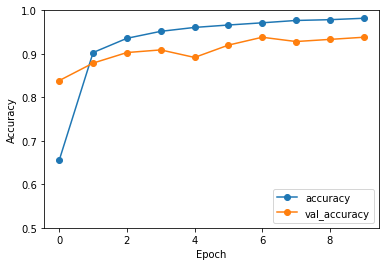

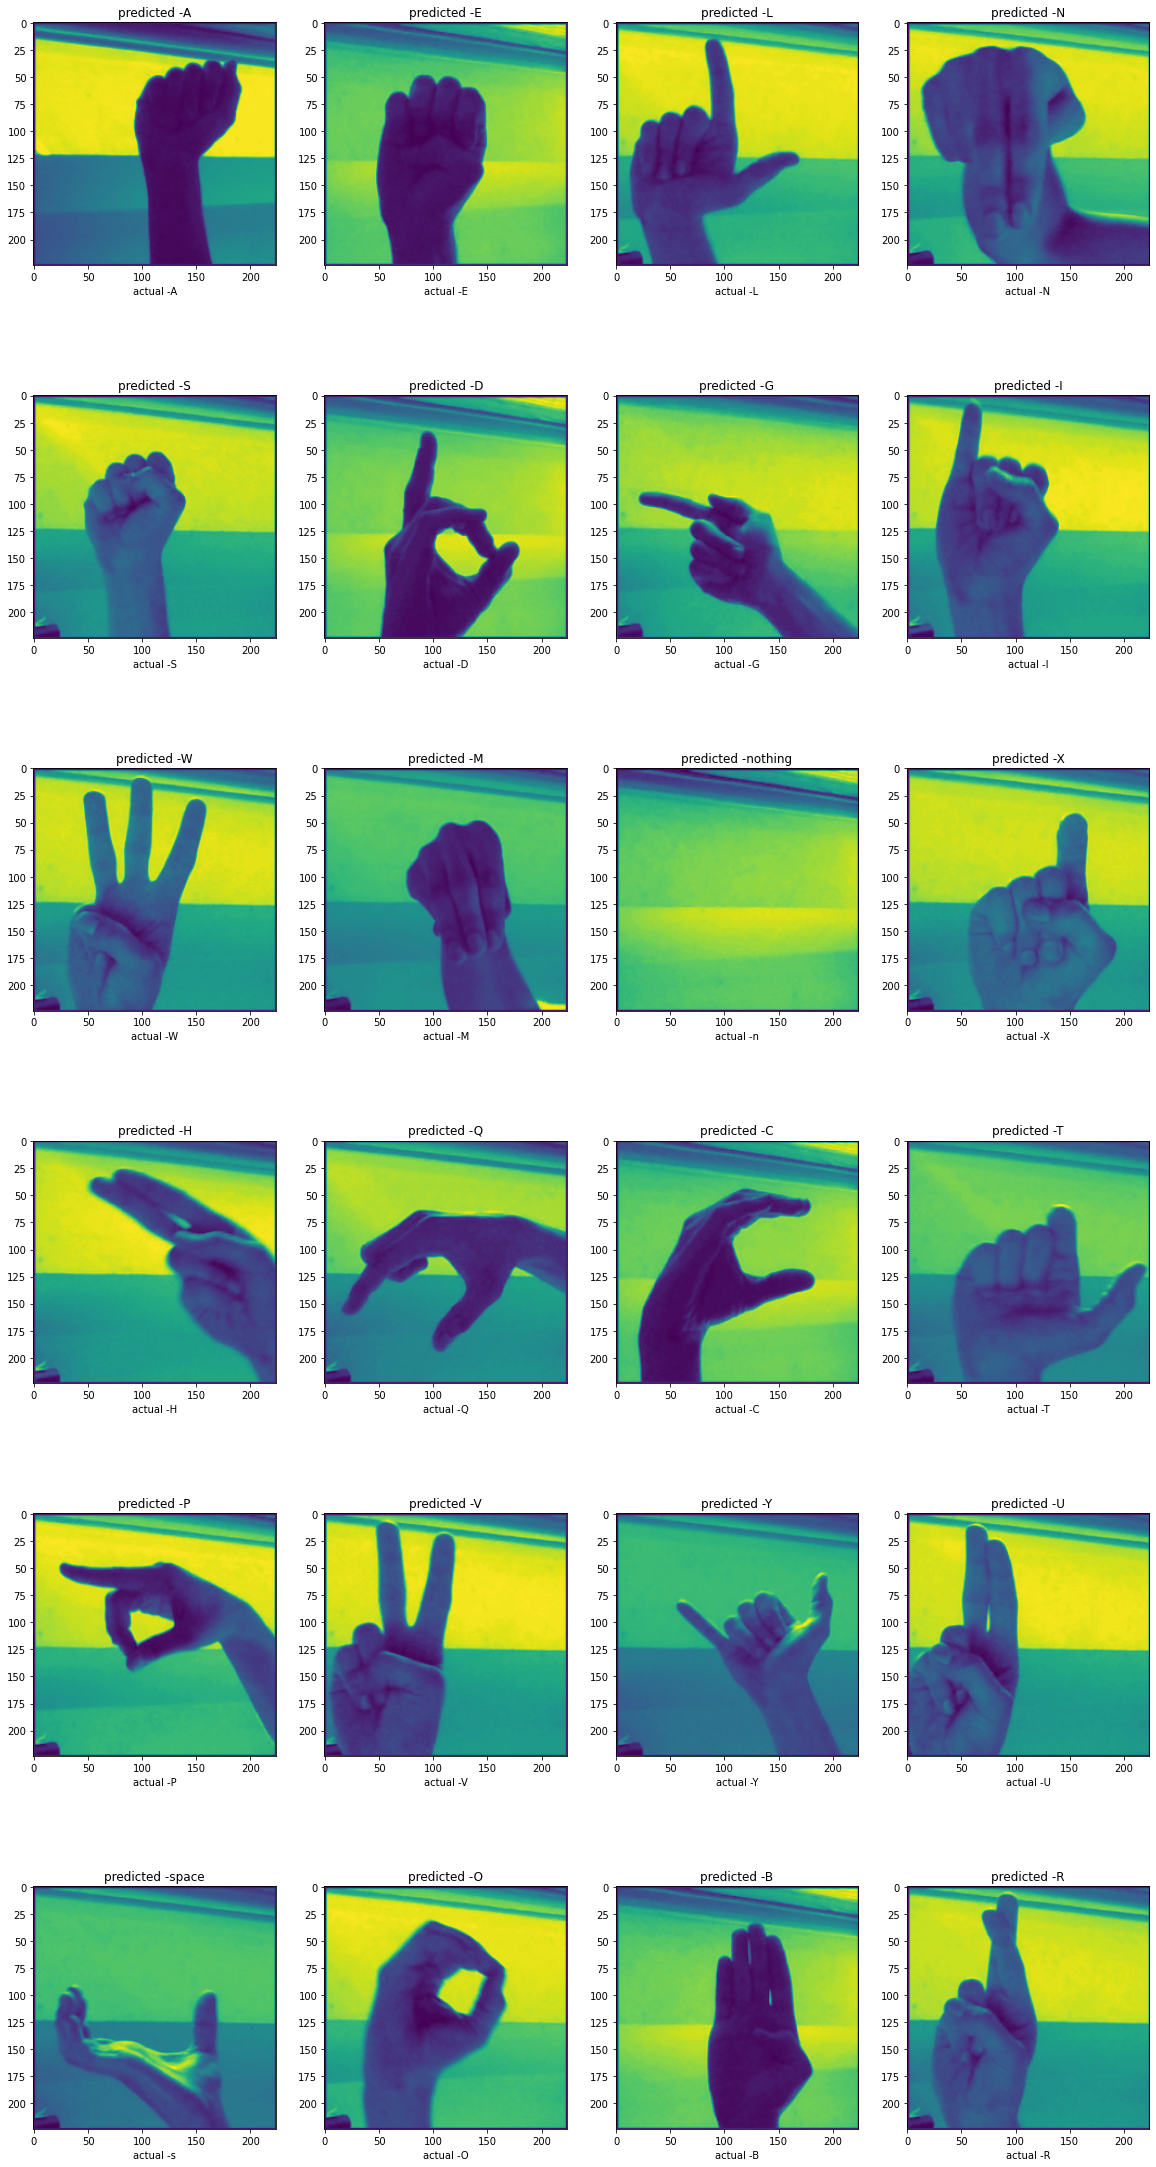

In [12]:
## two layer CNN with lesser filter 8, 8

##
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 1), filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
     tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 1), filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),   
  tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(29, activation=tf.nn.softmax)])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_ds, epochs=10, validation_data = val_ds)
##
test_loss, test_acc = model.evaluate(val_ds)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
##
model.save('model_cnn2')
## for validation data set , check the classification report.
val_pred = np.array([])
val_labels = np.array([])
for x, y in val_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    val_pred = np.concatenate([val_pred,np.array(predictions)])
    val_labels = np.concatenate([val_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(val_labels, val_pred, target_names=class_names))
##
print(model.summary())
##
predicted_labels = model.predict(pred_images_resized)
pred_labels = np.argmax(predicted_labels, axis = -1)
##
## visualize prediction images with the prediction 
plt.figure(figsize=(20, 40))
for i in range(24):
    ax = plt.subplot(6, 4, i + 1)
    plt.imshow(pred_images[i])
    plt.title("predicted -" + class_names[pred_labels[i]])
    plt.xlabel("actual -" + test_class[i])

The model has 100% test set accuracy for  this fold of  cross validation and with this set of training and validation images.   

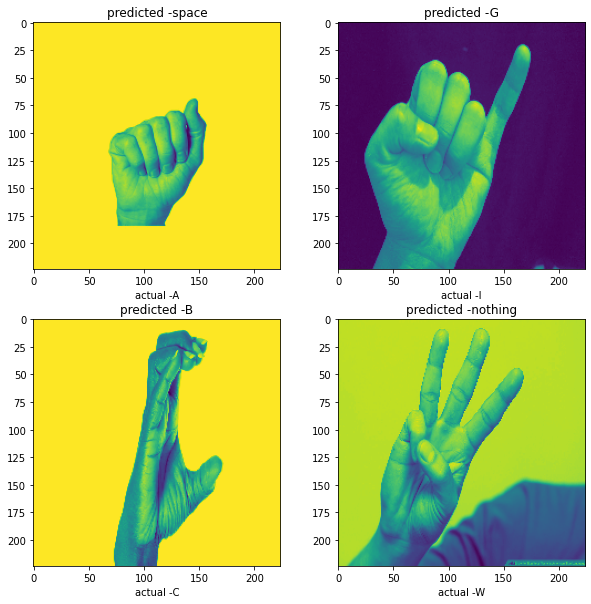

In [13]:
## test the new images 
predicted_labels_1 = model.predict(pred_images1_resized)
pred_labels_1 = np.argmax(predicted_labels_1, axis = -1)
##
## visualize prediction images with the prediction 
plt.figure(figsize=(10, 10))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(pred_images_1[i])
    plt.title("predicted -" + class_names[pred_labels_1[i]])
    plt.xlabel("actual -" + test_class_1[i])

For the new test images that are downloaded from the net, the model has incorrectly identified the letters.  

Epoch 1/10
2040/2040 [==============================] - 122s 59ms/step - loss: 5.2070 - accuracy: 0.5713 - val_loss: 0.2133 - val_accuracy: 0.9317
Epoch 2/10
2040/2040 [==============================] - 119s 58ms/step - loss: 0.1555 - accuracy: 0.9495 - val_loss: 0.1287 - val_accuracy: 0.9577
Epoch 3/10
2040/2040 [==============================] - 120s 59ms/step - loss: 0.0918 - accuracy: 0.9709 - val_loss: 0.1394 - val_accuracy: 0.9585
Epoch 4/10
2040/2040 [==============================] - 119s 58ms/step - loss: 0.0687 - accuracy: 0.9786 - val_loss: 0.1140 - val_accuracy: 0.9673
Epoch 5/10
2040/2040 [==============================] - 118s 58ms/step - loss: 0.0514 - accuracy: 0.9846 - val_loss: 0.0956 - val_accuracy: 0.9737
Epoch 6/10
2040/2040 [==============================] - 119s 58ms/step - loss: 0.0520 - accuracy: 0.9849 - val_loss: 0.0821 - val_accuracy: 0.9803
Epoch 7/10
2040/2040 [==============================] - 119s 58ms/step - loss: 0.0423 - accuracy: 0.9883 - val_loss: 0

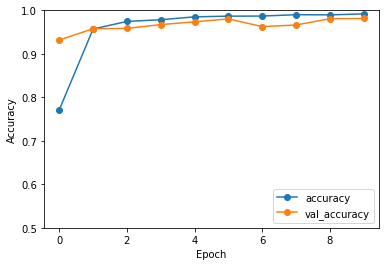

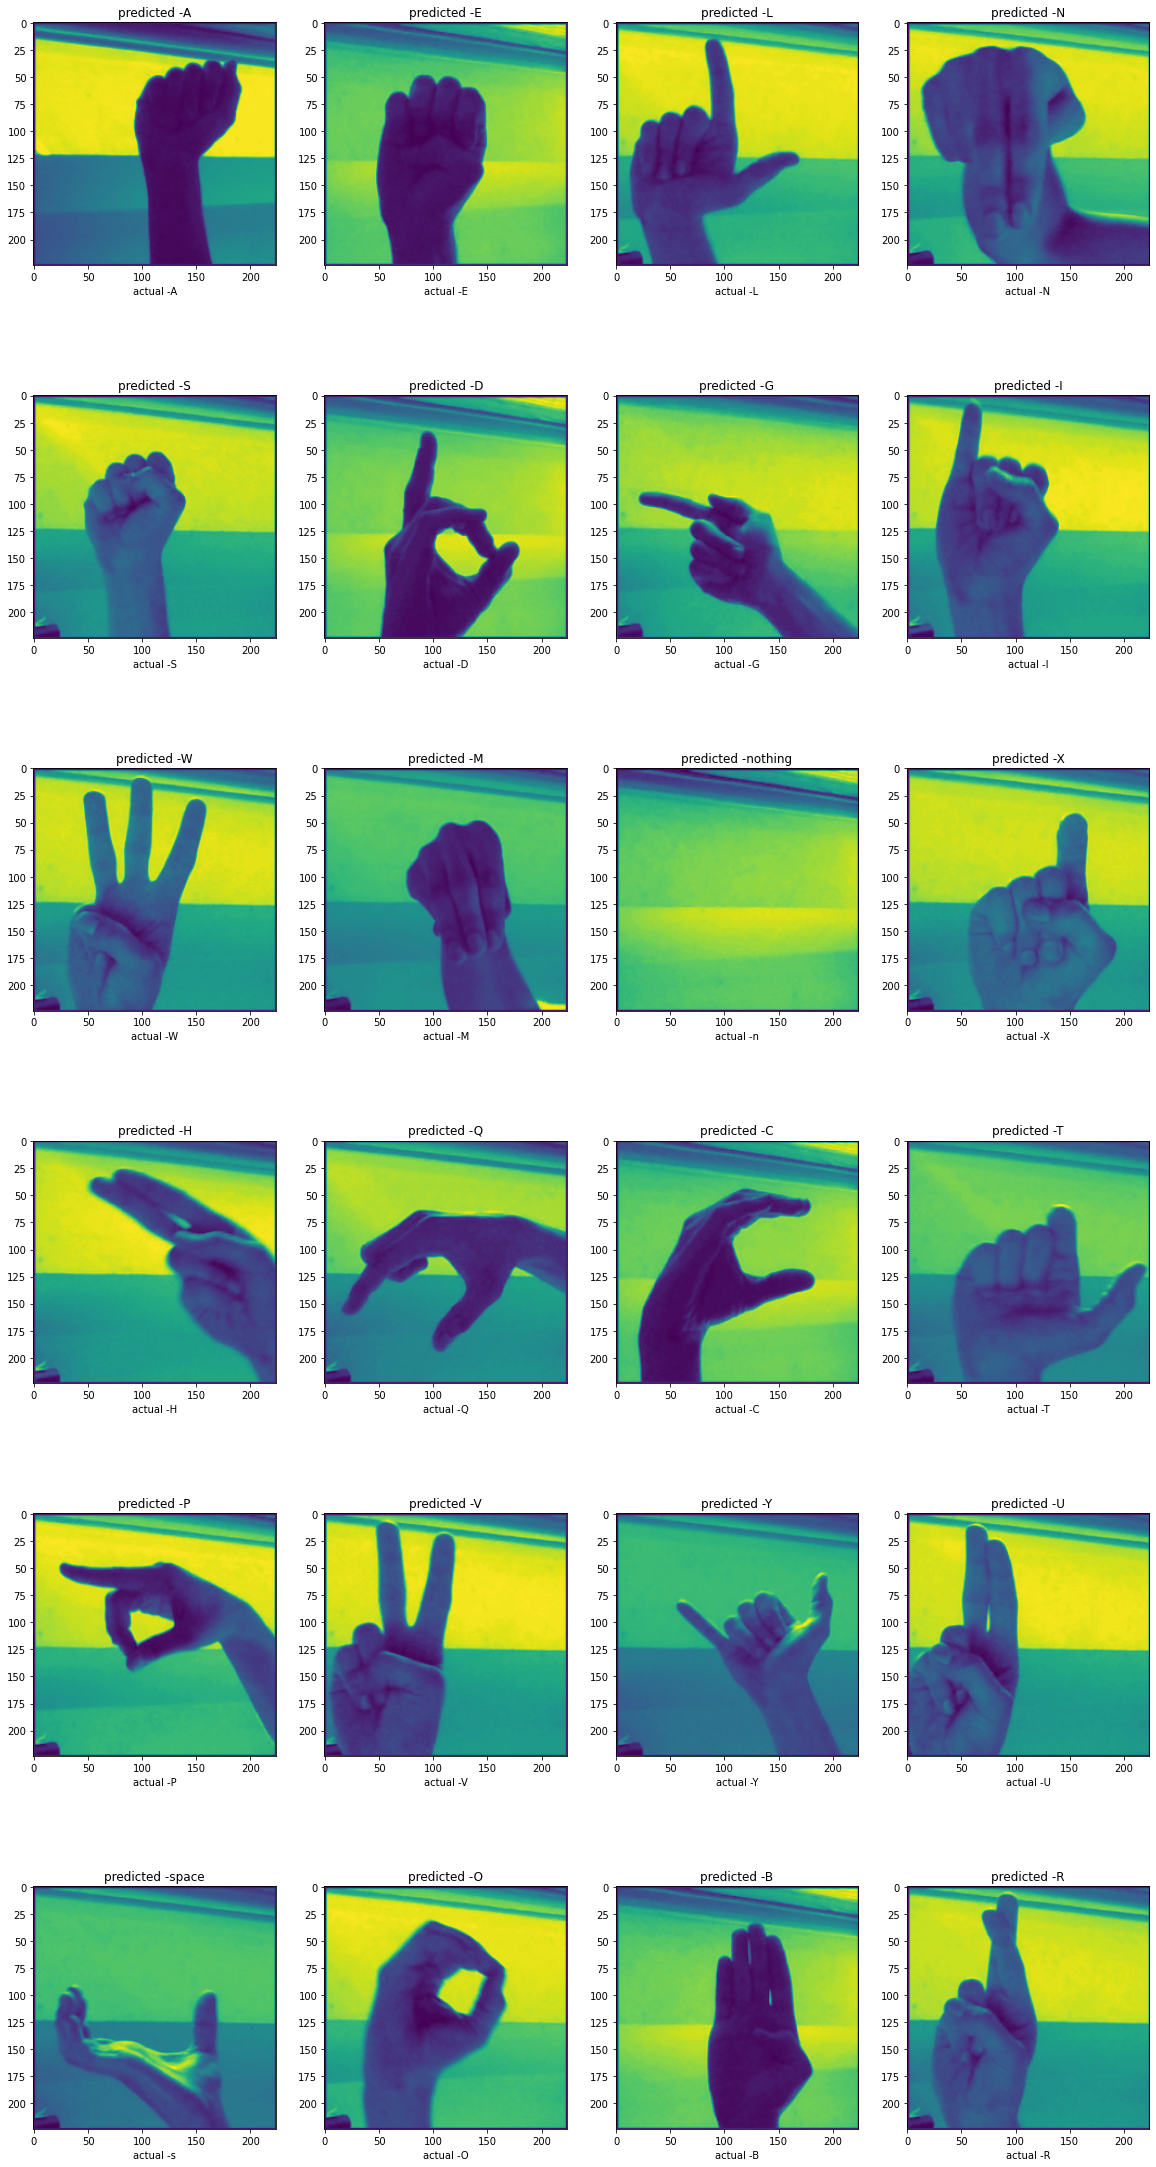

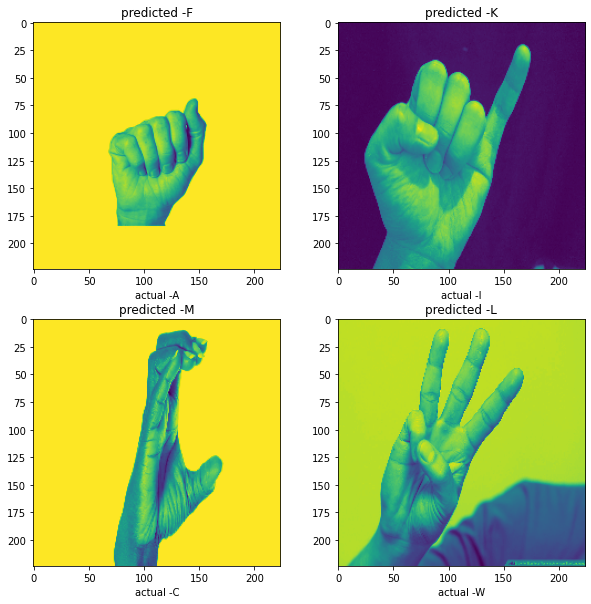

In [14]:
## Check if a 3 layer CNN model performs better on the new test images.  
## two layer CNN with lesser filter 8, 8

##
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 1), filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
     tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 1), filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),   
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 1), filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),  
  tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(29, activation=tf.nn.softmax)])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_ds, epochs=10, validation_data = val_ds)
##
test_loss, test_acc = model.evaluate(val_ds)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
##
model.save('model_cnn3')
## for validation data set , check the classification report.
val_pred = np.array([])
val_labels = np.array([])
for x, y in val_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    val_pred = np.concatenate([val_pred,np.array(predictions)])
    val_labels = np.concatenate([val_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(val_labels, val_pred, target_names=class_names))
##
print(model.summary())
##
predicted_labels = model.predict(pred_images_resized)
pred_labels = np.argmax(predicted_labels, axis = -1)
##
## visualize prediction images with the prediction 
plt.figure(figsize=(20, 40))
for i in range(24):
    ax = plt.subplot(6, 4, i + 1)
    plt.imshow(pred_images[i])
    plt.title("predicted -" + class_names[pred_labels[i]])
    plt.xlabel("actual -" + test_class[i])
##
## test the new images 
predicted_labels_1 = model.predict(pred_images1_resized)
pred_labels_1 = np.argmax(predicted_labels_1, axis = -1)
##
## visualize prediction images with the prediction 
plt.figure(figsize=(10, 10))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(pred_images_1[i])
    plt.title("predicted -" + class_names[pred_labels_1[i]])
    plt.xlabel("actual -" + test_class_1[i])

The three layer CNN Model though has predicted the test images correctly , it has incorrectly identified the new test images.   